🔎 Model Performance:
R² Score : 0.9564
RMSE     : 0.3110
MAE      : 0.2313


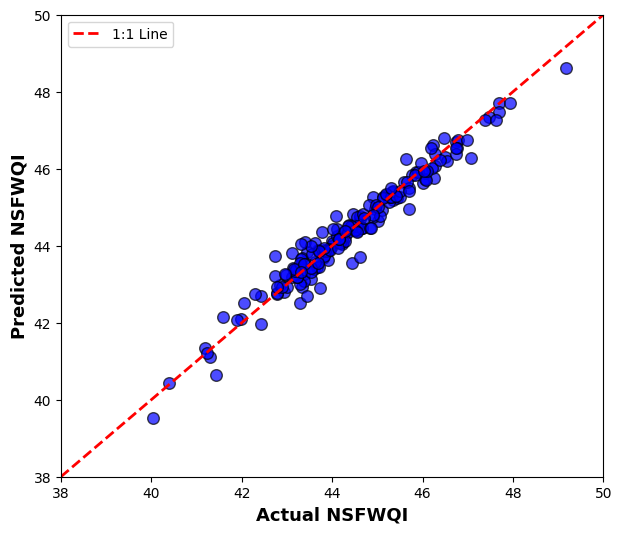

In [1]:
# ===============================
# Import libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ===============================
# Load the dataset
# ===============================
df = pd.read_csv("NSF.CCME.csv")

# Features (X) and Target (y)
X = df[["NO3", "COD", "FC", "BOD", "TDS"]]
y = df["NSF"]

# ===============================
# Train-test split (70:30)
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ===============================
# Feature scaling (important for MLP)
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# Build MLP model with tuned parameters
# ===============================
mlp = MLPRegressor(
    hidden_layer_sizes=(3,),   # single hidden layer with 3 neurons
    activation="logistic",     # logistic sigmoid activation
    alpha=0.0001,              # L2 regularization parameter
    learning_rate="constant",  # constant learning rate
    solver="lbfgs",            # optimizer
    max_iter=10000,            # ensure convergence
    random_state=42
)

# Train model
mlp.fit(X_train_scaled, y_train)

# ===============================
# Predictions and evaluation
# ===============================
y_pred = mlp.predict(X_test_scaled)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("🔎 Model Performance:")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

# ===============================
# Plot Actual vs Predicted
# ===============================
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7, edgecolors="k", s=70)

# Axis limits and ticks
lims = [38, 50]
plt.plot(lims, lims, "r--", lw=2, label="1:1 Line")  # 1:1 Line

plt.xlim(lims)
plt.ylim(lims)
plt.xticks(np.arange(38, 52, 2))
plt.yticks(np.arange(38, 52, 2))

plt.xlabel("Actual NSFWQI", fontsize=13, fontweight="bold")
plt.ylabel("Predicted NSFWQI", fontsize=13, fontweight="bold")
plt.legend()

# Remove gridlines
plt.grid(False)

# Save plot
plt.savefig("NSF_WQI_Actual_vs_Predicted.png", dpi=1000, bbox_inches="tight")
plt.show()


In [2]:
# ===============================
# model_train.py
# ===============================

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# ===============================
# Load dataset
# ===============================
df = pd.read_csv("NSF.CCME.csv")

# Features (X) and Target (y)
X = df[["NO3", "COD", "FC", "BOD", "TDS"]]
y = df["NSF"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build and train MLP model
mlp = MLPRegressor(
    hidden_layer_sizes=(3,),
    activation="logistic",
    alpha=0.0001,
    learning_rate="constant",
    solver="lbfgs",
    max_iter=10000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# ===============================
# Save model and scaler
# ===============================
joblib.dump(mlp, "mlp_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [3]:
# ===============================
# app.py
# ===============================
import streamlit as st
import numpy as np
import joblib

# Load trained model and scaler
mlp = joblib.load("mlp_model.pkl")
scaler = joblib.load("scaler.pkl")

# ===============================
# Streamlit UI
# ===============================
st.set_page_config(page_title="NSFWQI Prediction", layout="centered")

st.title("🌊 NSFWQI Prediction System")
st.write("Enter water quality parameters to calculate the NSFWQI:")

# Input fields
NO3 = st.number_input("NO3 (mg/L)", min_value=0.0, step=0.01)
COD = st.number_input("COD (mg/L)", min_value=0.0, step=0.01)
FC = st.number_input("Fecal Coliform (CFU/100ml)", min_value=0.0, step=0.01)
BOD = st.number_input("BOD (mg/L)", min_value=0.0, step=0.01)
TDS = st.number_input("TDS (mg/L)", min_value=0.0, step=0.01)

# Predict button
if st.button("🔎 NSFWQI"):
    features = np.array([[NO3, COD, FC, BOD, TDS]])
    features_scaled = scaler.transform(features)
    prediction = mlp.predict(features_scaled)[0]
    
    st.success(f"✅ NSFWQI: {prediction:.2f}")


2025-08-25 01:20:18.148 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 01:20:18.149 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 01:20:18.880 
  command:

    streamlit run C:\Users\MOHAMMAD ISMAIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-25 01:20:18.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 01:20:18.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 01:20:18.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 01:20:18.882 Thread 'MainThread': missing ScriptRunContex